In [18]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import random
from utils import plot_samples_with_labels, classify, plot_conf_matrix

### Load and prepare data

Esta es la celda original

In [19]:
# Download the MNIST dataset (handwritten digit images with labels)
mnist = keras.datasets.mnist
# (training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Esta es la celda renovada

In [20]:
from sklearn.model_selection import train_test_split
(training_images, training_labels), (X_train, X_test) = mnist.load_data()
validation_images, test_images, validation_labels, test_labels = train_test_split(X_train, X_test, test_size=0.5, random_state=42) 

Con el cambio anterior, se añade un conjunto de validación para que durante el proceso de entrenamiento se pueda ajustar hiperparámetros, lo cual lleva a mejorar el modelo y evitar el sobreajuste. Es incorrecto utilizar el conjunto de testeo como conjunto de validación en el entrenamiento, pues de esa manera el modelo se aprende esos datos y después no devuelve valores verídicos. El conjunto de testeo debe ser un conjunto que solo se utilice para evaluar el modelo una vez que ya esté depurado completamente.

In [21]:
training_images = training_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

# Reshape the data to include a channel dimension
training_images = training_images.reshape(training_images.shape[0], 28, 28, 1)
validation_images = validation_images.reshape(validation_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

### Build the model

In [22]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    
    # Fourth convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    
    # Flattening the 3D output to 1D before feeding it into the dense layer
    layers.Flatten(),
    
    # Dense layers for classification
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # For 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary to see the architecture and parameters
model.summary()

c:\Users\Ricardo Capiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 1, 1, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,058 (101.79 KB)

 Trainable params: 26,058 (101.79 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

### Train the model

In [24]:
BATCH_SIZE = 32
num_training_images = training_images.shape[0]
num_epochs = 10

history = model.fit(
    training_images, training_labels,
    epochs= num_epochs,
    batch_size=BATCH_SIZE,
    validation_data=(validation_images, validation_labels)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8489 - loss: 0.4794 - val_accuracy: 0.9822 - val_loss: 0.0618
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9795 - loss: 0.0701 - val_accuracy: 0.9882 - val_loss: 0.0362
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9849 - loss: 0.0491 - val_accuracy: 0.9896 - val_loss: 0.0359
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9881 - loss: 0.0386 - val_accuracy: 0.9896 - val_loss: 0.0350
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9898 - loss: 0.0324 - val_accuracy: 0.9882 - val_loss: 0.0348
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - accuracy: 0.9916 - loss: 0.0262 - val_accuracy: 0.9888 - val_loss: 0.0395
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9931 - loss: 0.0218 - val_accuracy: 0.9888 - val_loss: 0.0406
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9946 - los

In [25]:
model.save('models/digit_CNN.h5')

In [26]:
num_epochs = 10

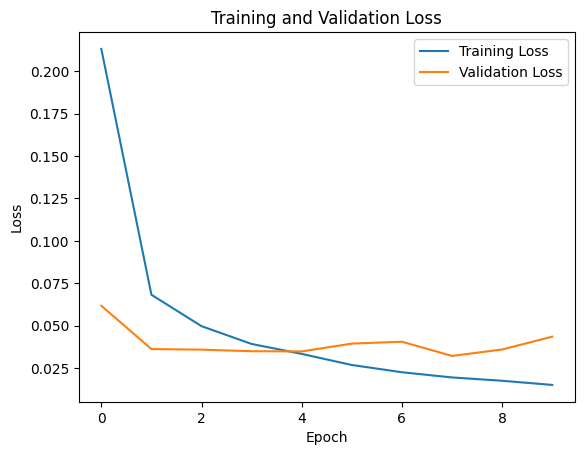

In [27]:
# Save the metrics.
metrics = history.history
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Validation Loss')
plt.legend()
plt.show()

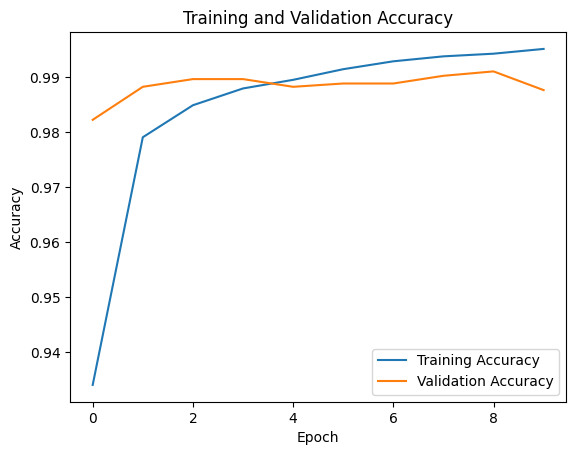

In [28]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Validation Accuracy')
plt.legend()
plt.show()

### Using the model to classify new images

In [29]:
from tensorflow.keras.models import load_model
model_cnn = load_model('models/digit_CNN.h5')

In [30]:
predicted_labels = classify(test_images, model_cnn)
predicted_labels = np.array(predicted_labels)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [31]:
from sklearn.metrics import classification_report, accuracy_score
# Calculate metrics
print("Accuracy:", accuracy_score(test_labels, predicted_labels))
print("\nClassification Report:\n")
print(classification_report(test_labels, predicted_labels))

Accuracy: 0.9882

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       494
           1       0.99      1.00      0.99       561
           2       0.99      1.00      0.99       524
           3       0.99      0.99      0.99       523
           4       0.99      0.98      0.98       501
           5       0.99      0.98      0.99       415
           6       1.00      0.97      0.98       494
           7       0.99      0.99      0.99       496
           8       0.98      0.99      0.98       480
           9       0.98      0.98      0.98       512

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



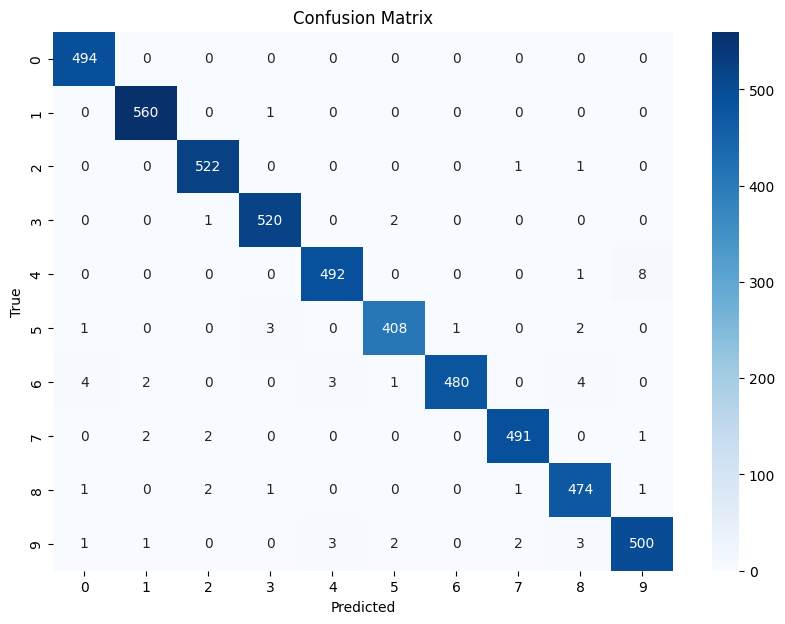

In [32]:
# Generate confusion matrix
plot_conf_matrix(test_labels, predicted_labels)

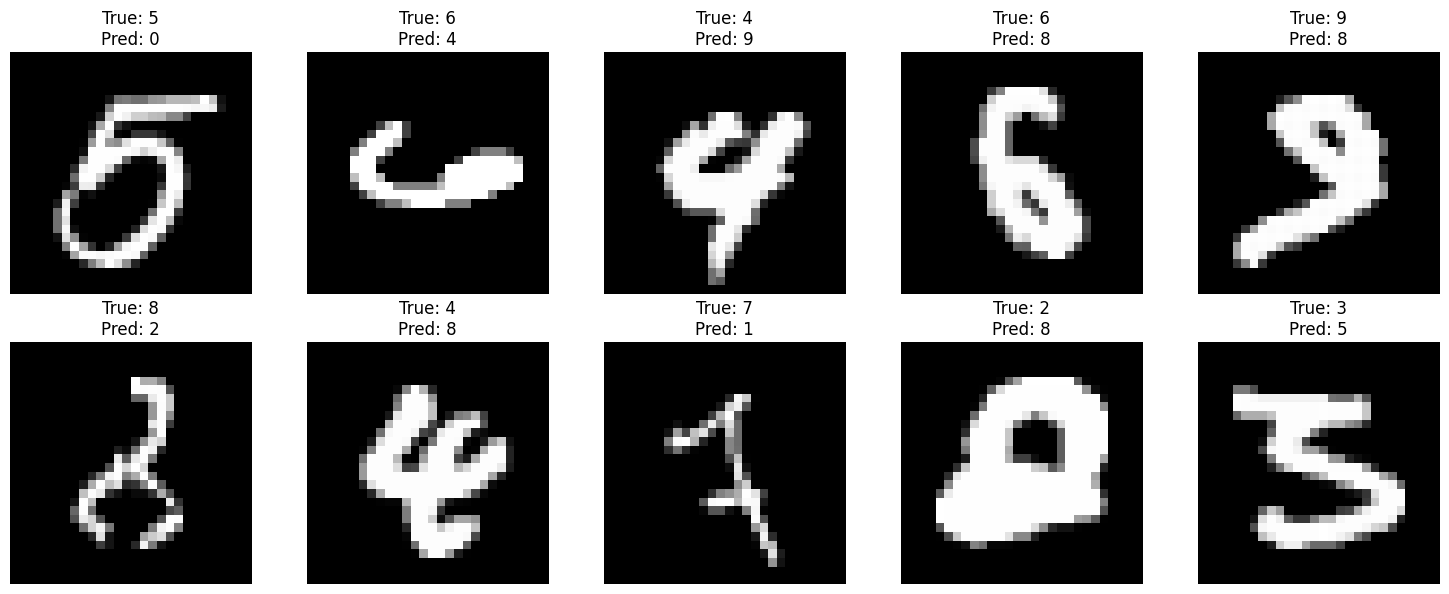

In [33]:
# Visualize some misclassified images

misclassified_indices = (test_labels != predicted_labels)
misclassified_images = test_images[misclassified_indices]
misclassified_true_labels = test_labels[misclassified_indices]
misclassified_predicted_labels = predicted_labels [misclassified_indices]

if len(misclassified_images) > 0:
    plot_samples_with_labels(misclassified_images, misclassified_true_labels, misclassified_predicted_labels, num_samples = 10, randomize= True)
else:
    print("No misclassified images found in the selected batch.")

In [34]:
print(len(misclassified_images))

59
